In [237]:
import QuantLib as ql
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [324]:
def p(k_i):  
    
    def gen_paths(L, T, sigma_l, steps, N):  # Simulation for Libor
        dt = T / steps
        LT = np.log(L) + np.cumsum((( - sigma_l ** 2 / 2) * (T) + \
                                      sigma_l * np.sqrt(T) * \
                                      np.random.normal(size=(steps, N))), axis=0)

        return np.exp(LT)

    def gen_paths2(S, T, r, q, sigma_s, sigma_x, sigma_p, rho1, rho2, steps, N):  # Simulation for quanto
        dt = T / steps
        ST = np.log(S) + np.cumsum(((r - q - sigma_s * sigma_x * rho1 + rho2 * sigma_p * sigma_s - sigma_s ** 2 / 2) * dt + \
                                      sigma_s * np.sqrt(T) * \
                                      np.random.normal(size=(steps, N))), axis=0)

        return np.exp(ST)

    L = 1.36  #Libor L_{0}
    S = 27003.560547  # stock price S_{0}
    T = 3  # time to maturity (in year)
    r = 0.02   # risk free risk in annual %
    q = 0.0152  # annual dividend rate
    sigma_S = 0.011966278630595297  # annual volatility (stock)
    sigma_X = 0.004055125840025642  # annual volatility (exchange rate)
    sigma_P = 0.15539427910616832   # annual volatility (T-bond) need more data
    sigma_L = 0.02706690514545634   # annual volatility (Libor)
    cor =  0.036397916482133884  # correlation between stock price and exchange rate
    cor2 = 0.1585817213425081   # correlation between stock price and Libor
    steps = 252 * T  # time steps (daily)
    N = 1000  # number of trials
    Delta = 0.75  # 3 months

    paths = gen_paths2(S, T, r, q, sigma_S, sigma_X, sigma_P, cor, cor2, steps, N)
    paths2 = gen_paths(L, T-Delta, sigma_L, steps, N)

    S_T = paths[-1]   # pricing quanto equity
    L_T = paths2[-1]   # pricing Libor equity

    k=1
    Pi = (k_i - L_T / L) * (S_T / S - k)
    for i in range(1000):
        if Pi[i] < 0:
            Pi[i] = 0   # Take max(0, Pi)

    mean = np.mean(Pi)
    return mean

In [325]:
P_s = []
for i in range(200):
    P_s.append(p(1))

In [326]:
print("Mean of the simulated contract price", np.mean(P_s))

Mean of the simulated contract price 0.22012094325448445


In [327]:
print("90% of the simulated contract price interval", np.percentile(P_s, [5, 95]))

90% of the simulated contract price interval [0.19750744 0.24327666]


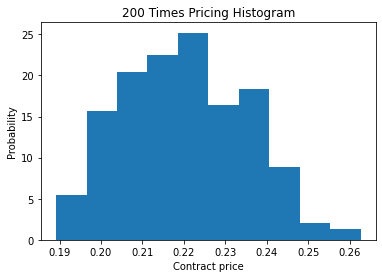

In [328]:
plt.hist(P_s, density=True, bins=10)  # density=False would make counts
plt.title("200 Times Pricing Histogram")
plt.ylabel('Probability')
plt.xlabel('Contract price');
plt.savefig("Log_normal_histogram.pdf")

In [320]:
k_s = []
for j in range(11):
    k_s.append(0.5+j*0.1)

In [321]:
P_sk=[]
for i in k_s:
    for j in range(100):
        P_sk.append(p(i))

In [322]:
P_mean = []
for i in range(11):
    P_mean.append(np.mean(P_sk[0+i*100:9+i*100]))

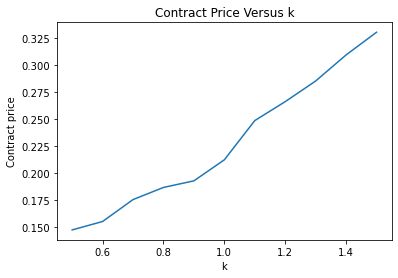

In [323]:
plt.plot(k_s, P_mean)
plt.title("Contract Price Versus k")
plt.ylabel('Contract price')
plt.xlabel('k');
plt.savefig("Contract_price_versus_k.pdf")